<a href="https://colab.research.google.com/github/hitarthi45/Machine-Learning/blob/main/Experiment/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#regression
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/exp-1_train.csv")
data.shape

(700, 2)

In [ ]:
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [ ]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [ ]:
(data.isnull().sum()/data.shape[0])*100

,0
x,0.000000
y,0.142857


In [ ]:
data.isnull().sum()

,0
x,0
y,1


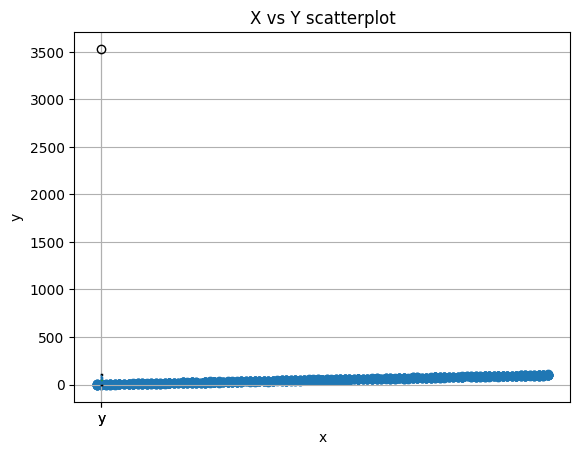

In [ ]:
x = data.iloc[0:700, 0:1]
y = data.iloc[0:700, 1:2]

x.boxplot(column=['x'])
y.boxplot(column=['y'])

#plot the scatter plot
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("X vs Y scatterplot")
plt.show()


In [ ]:
#linear regression
def hypothesis(theta_array, x):
  return theta_array[0] + theta_array[1]*x

def cost_function(theta_array, x, y, m):
  errors=0
  for i in range(m):
    errors+=((theta_array[0]+theta_array[1]*x[i])-y[i])*2
  return errors/(2*m)

In [ ]:
def gradient_descent(theta_array, x, y, m, alpha):
  sum0=0
  sum1=0
  for i in range(m):
    sum0+=((theta_array[0]+theta_array[1]*x[i])-y[i])
    sum1+=(x[i]*(theta_array[0]+theta_array[1]*x[i])-y[i])

  sum0 = sum0/m
  sum1 = sum1/m
  new_theta0 = (theta_array[0] - alpha*sum0)
  new_theta1 = (theta_array[1] - alpha*sum1)

  return [new_theta0, new_theta1]

In [ ]:
def training(x, y, alpha, iters):
  theta0=0
  theta1=0
  cost_values=[]
  theta_array=[theta0, theta1]
  m=len(x)

  for i in range(iters):
    theta_array = gradient_descent(theta_array, x, y, m, alpha)
    cost_values.append(cost_function(theta_array, x, y, m))
    y_predict = x*theta_array[1] + theta_array[0]
    plt.plot(y_predict, x, 'r')
    plt.scatter(x, y)
    plt.show()

  return cost_values,theta_array

In [ ]:
#feeding the data in the functions
training_data = data.dropna()
training_data.shape

(699, 2)

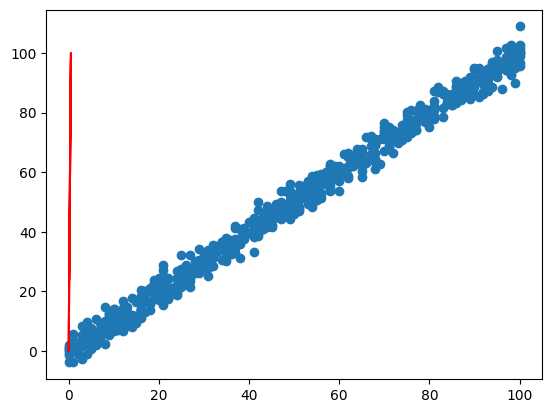

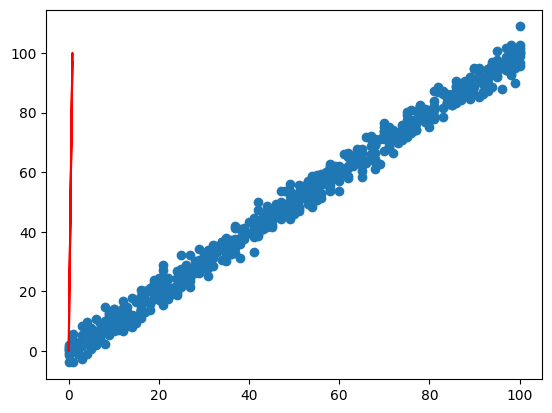

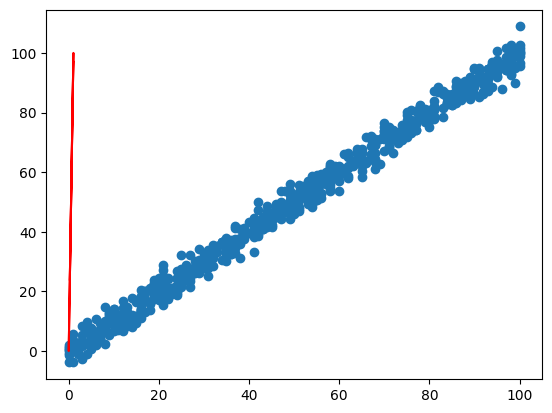

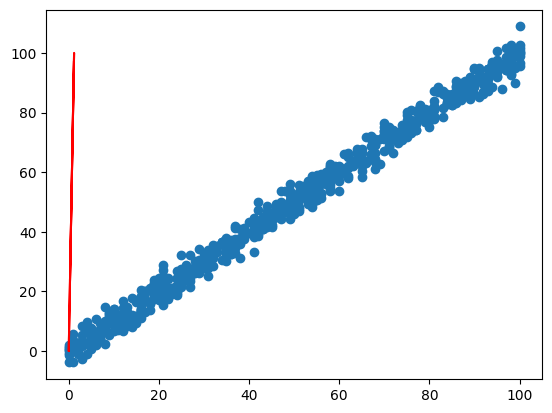

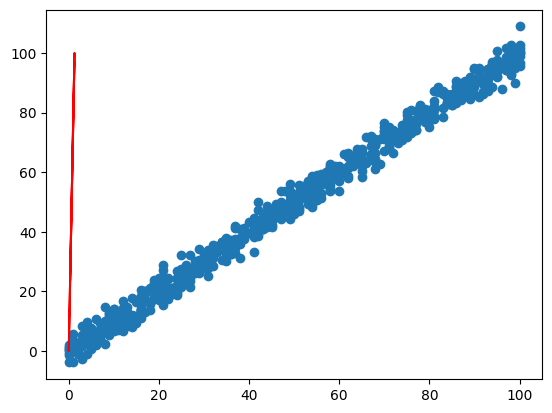

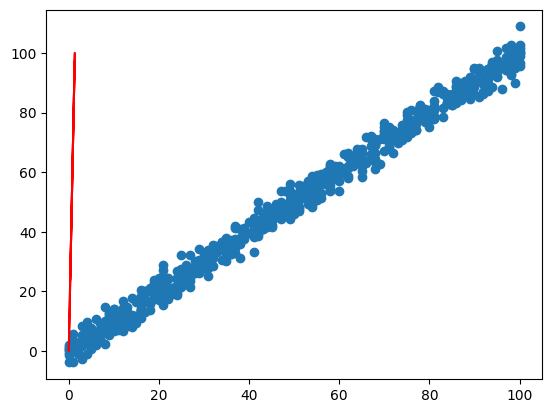

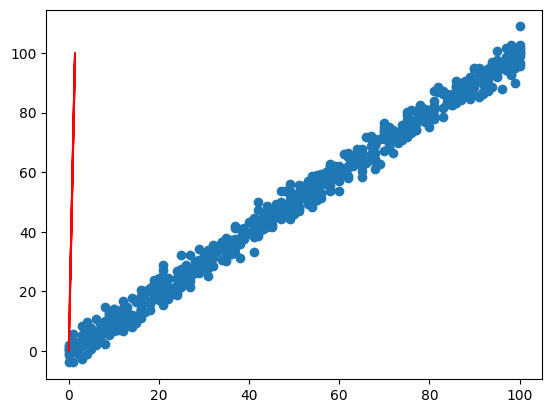

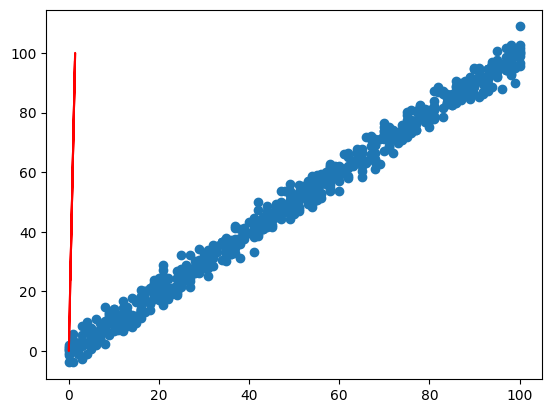

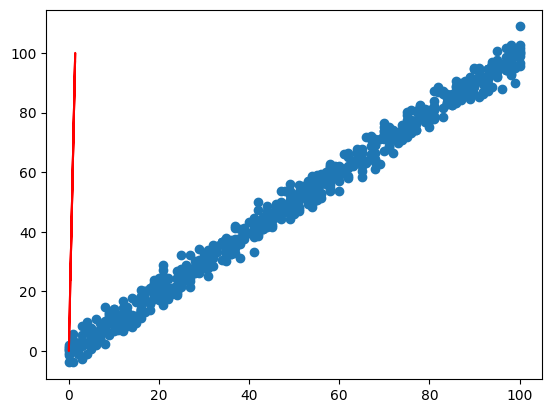

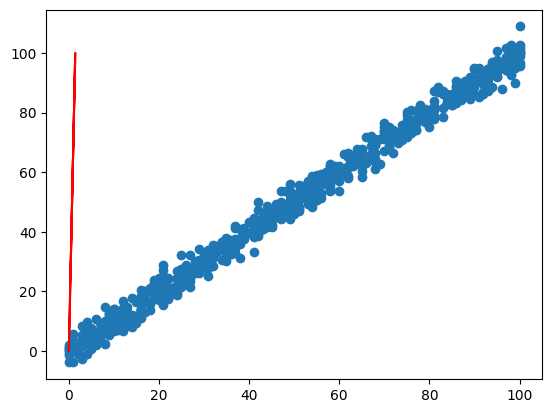

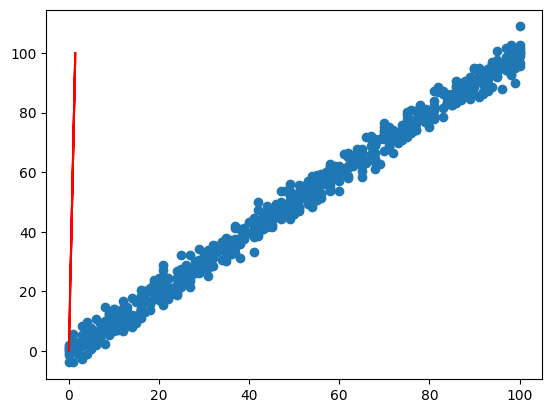

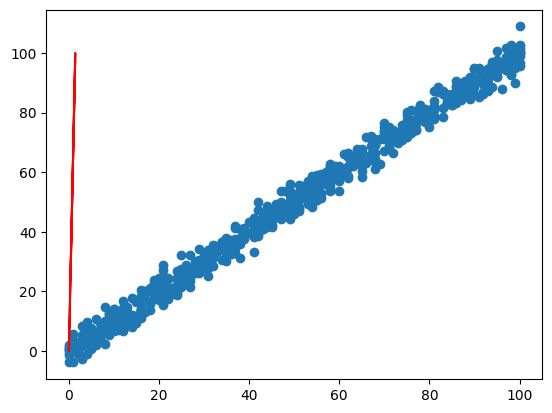

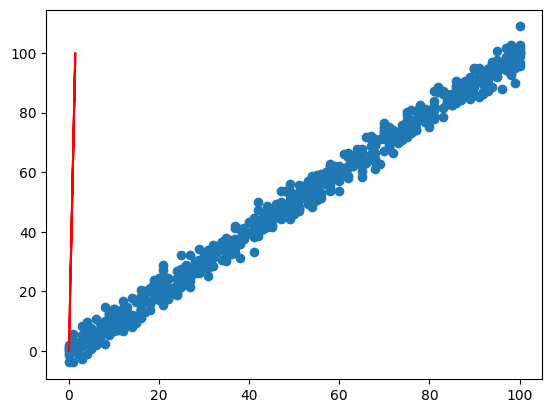

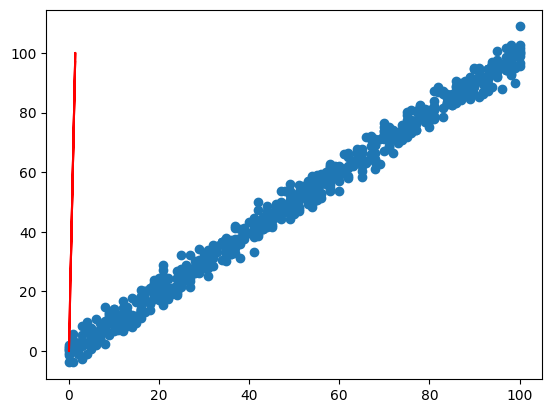

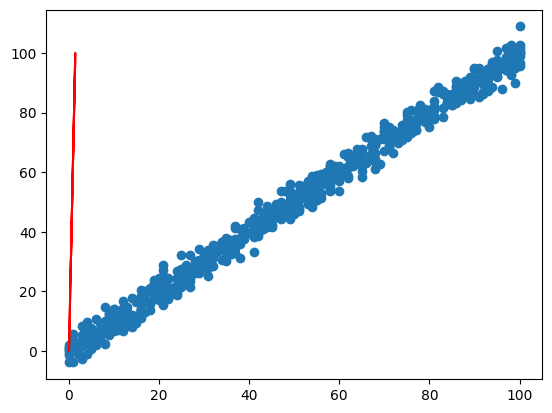

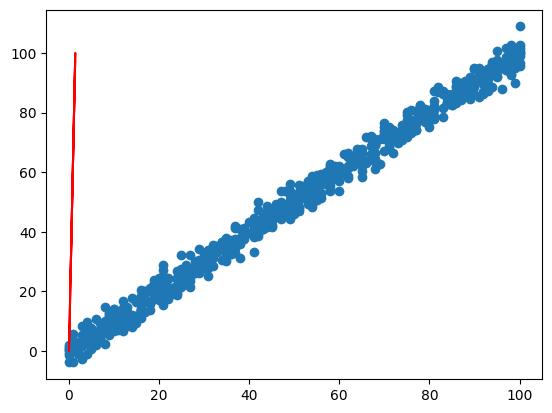

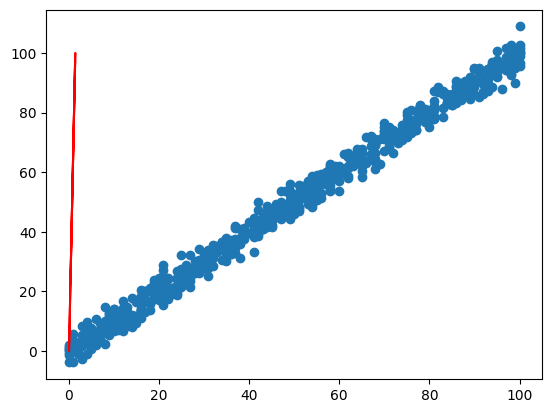

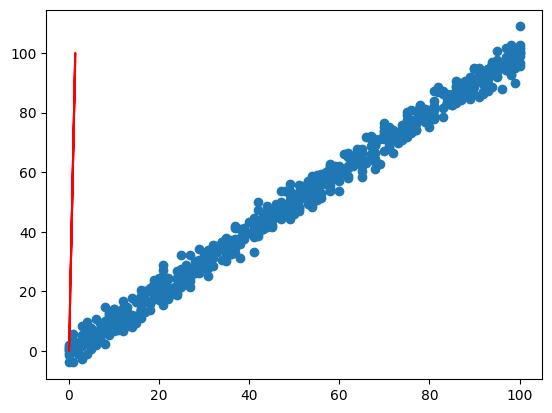

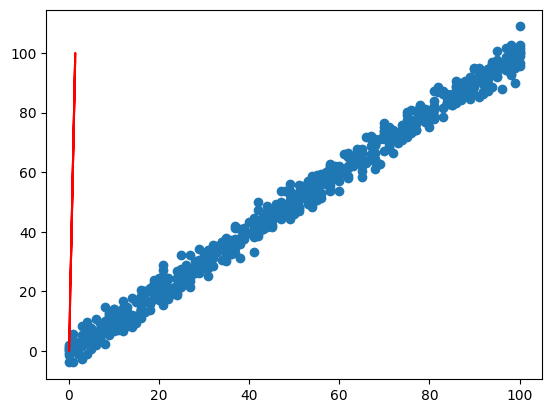

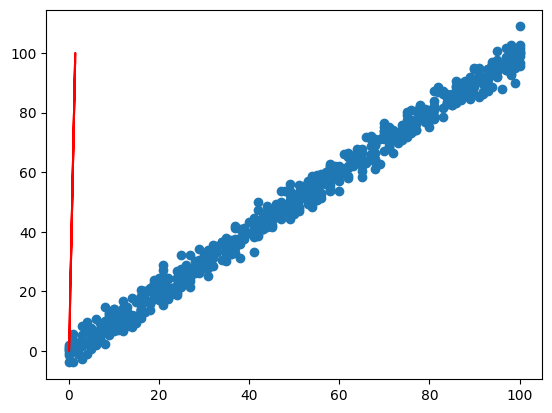

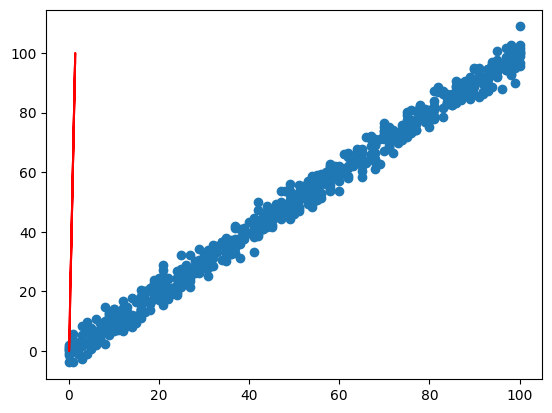

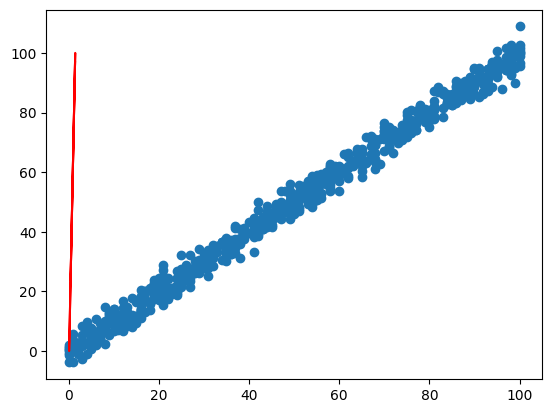

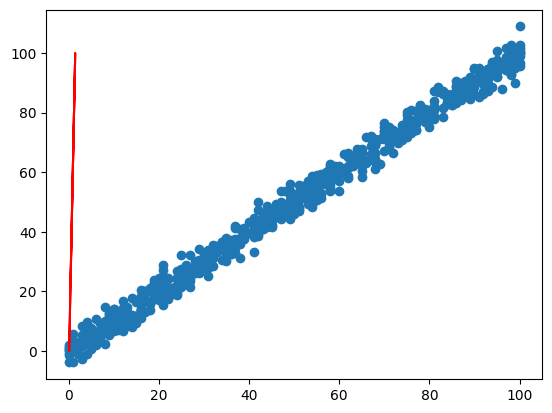

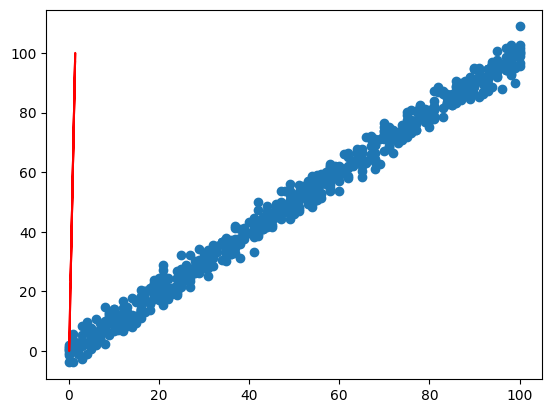

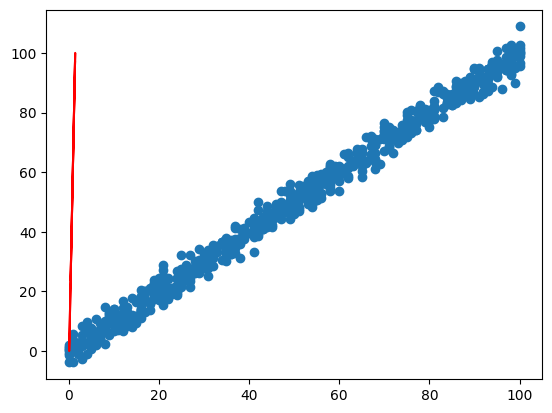

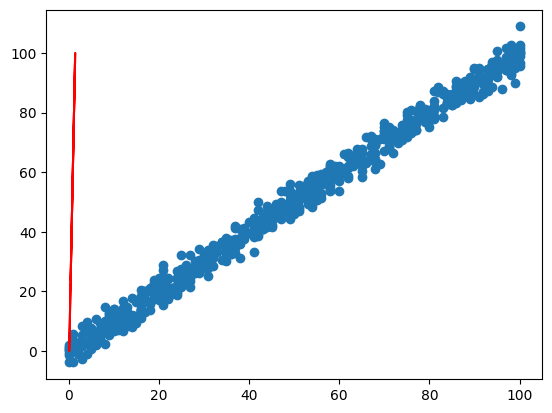

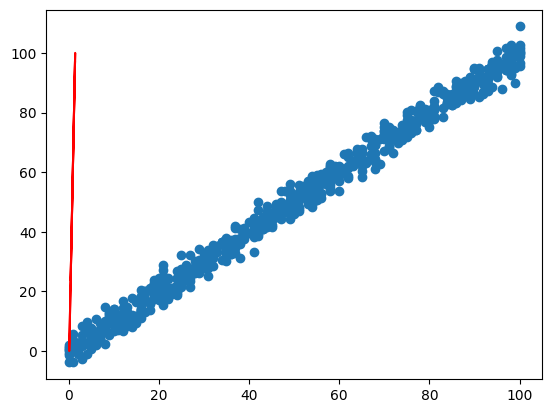

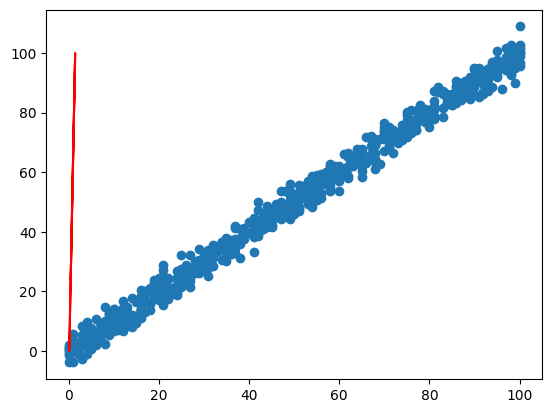

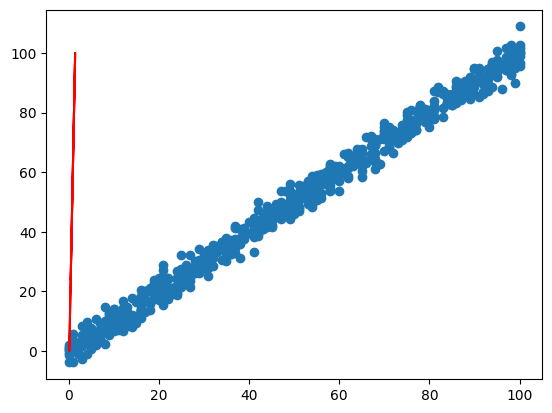

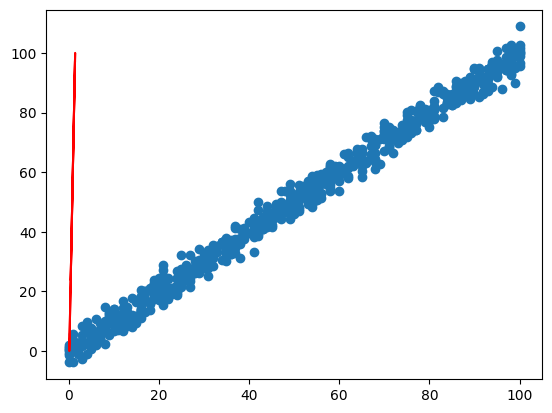

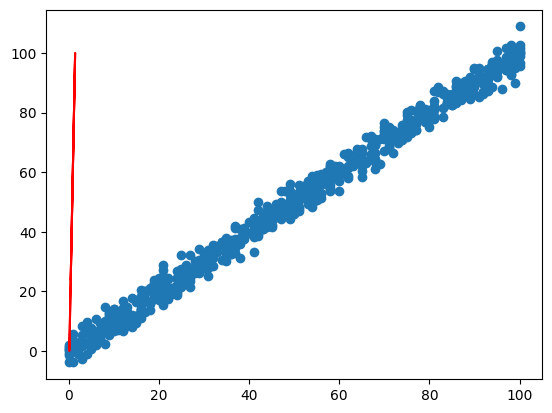

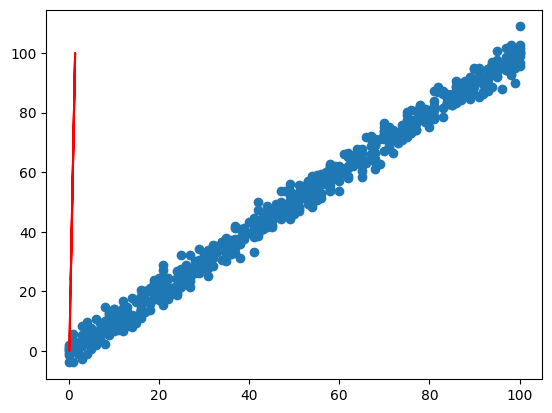

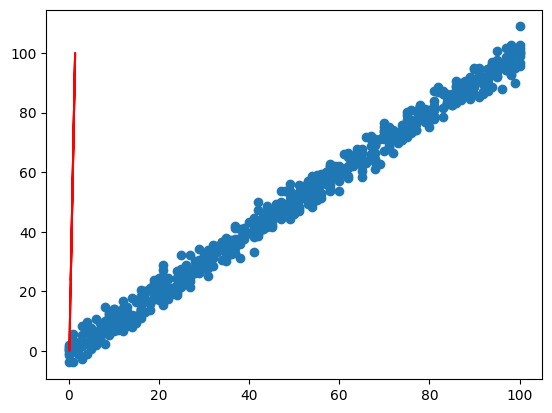

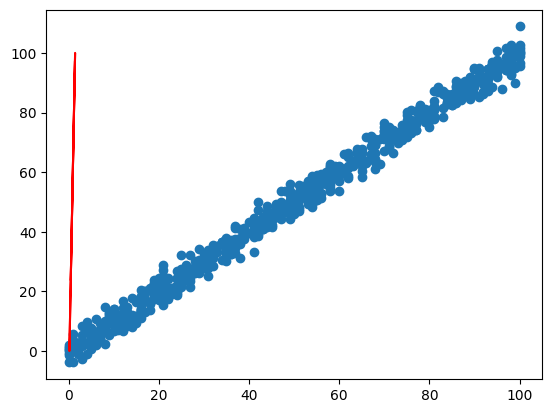

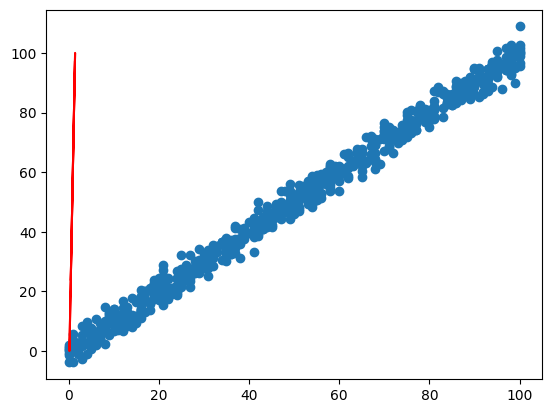

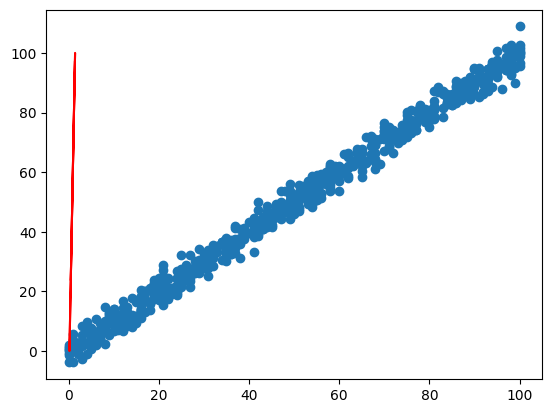

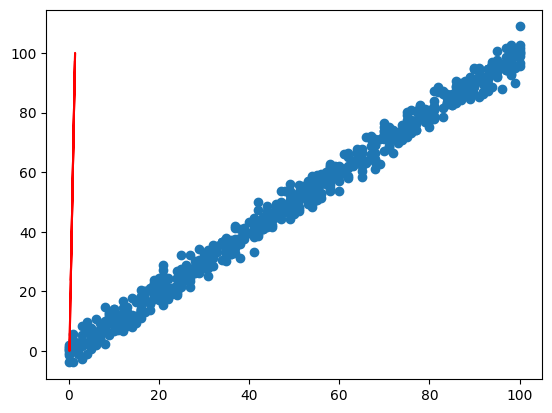

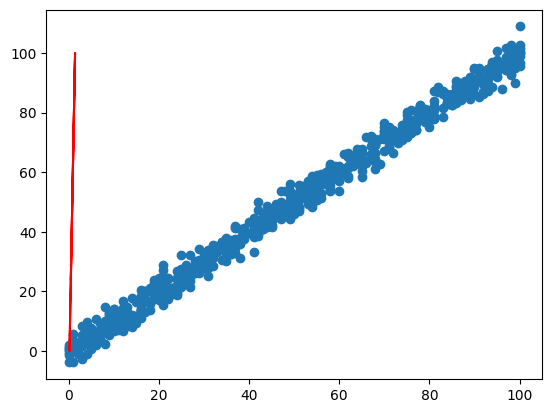

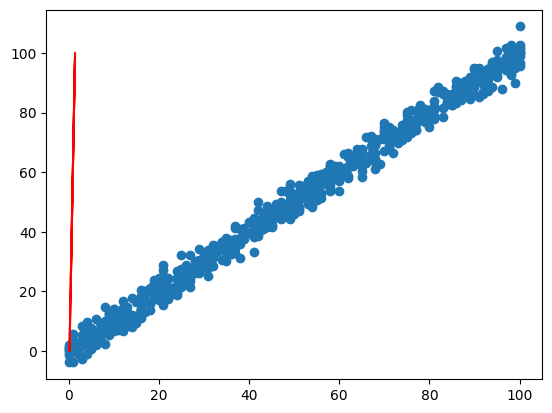

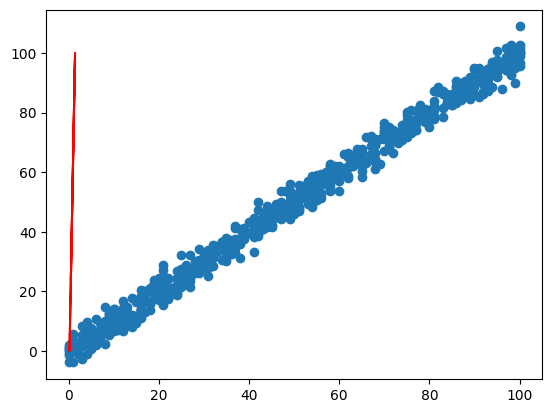

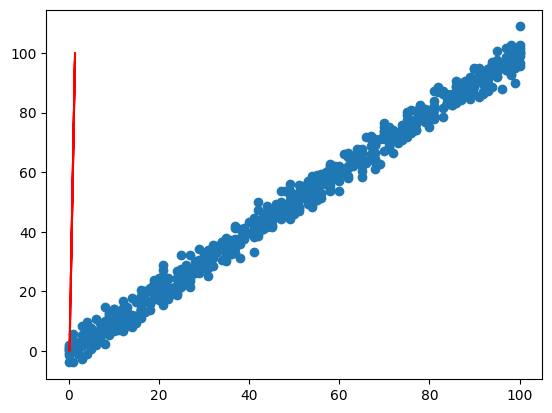

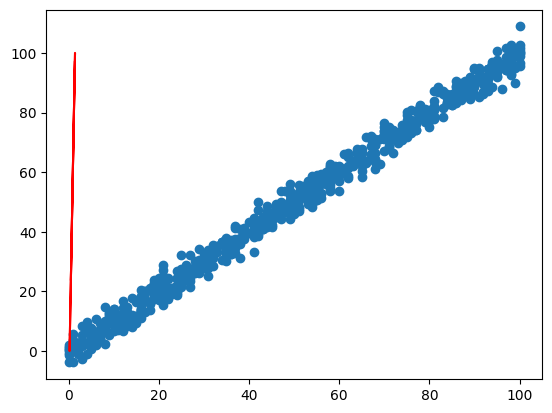

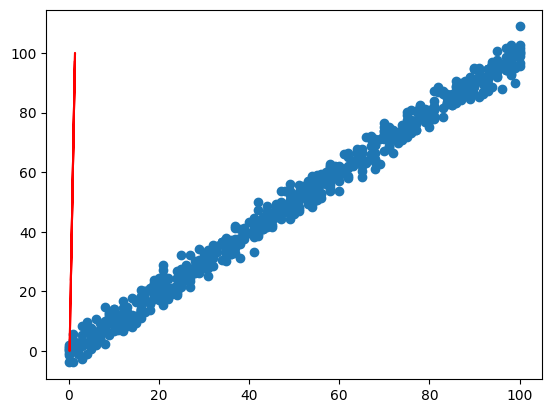

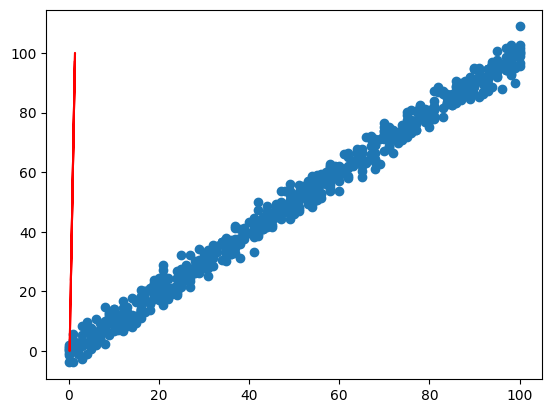

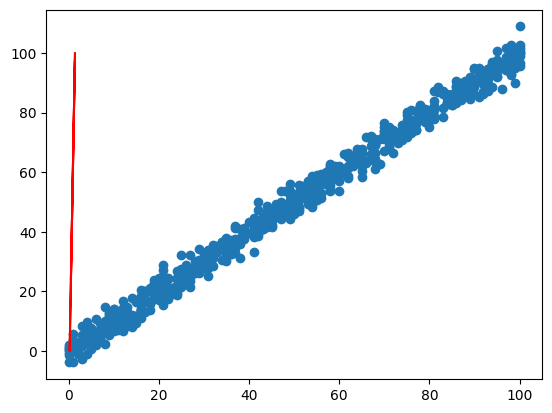

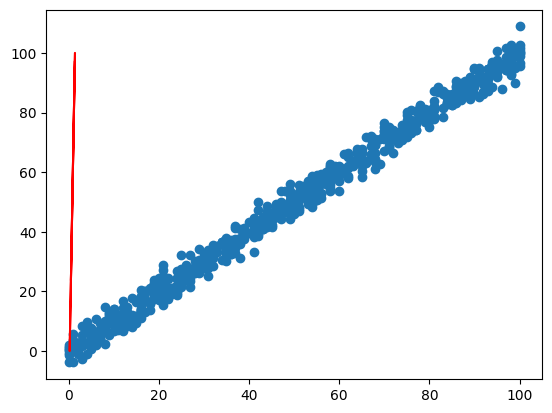

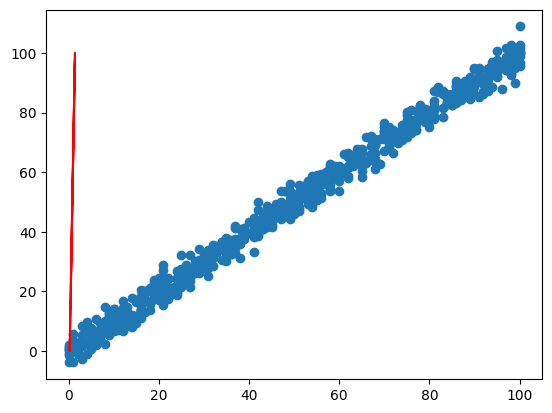

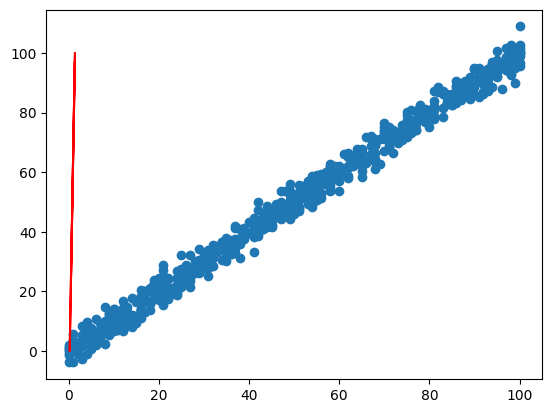

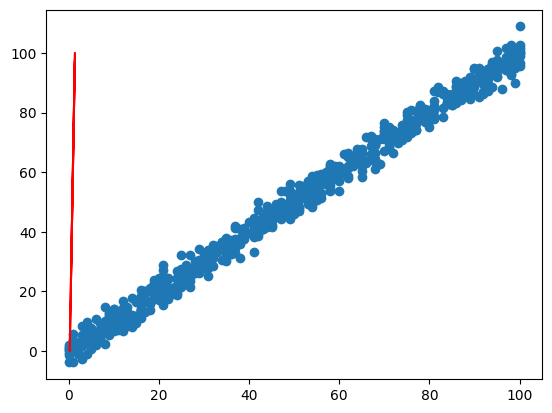

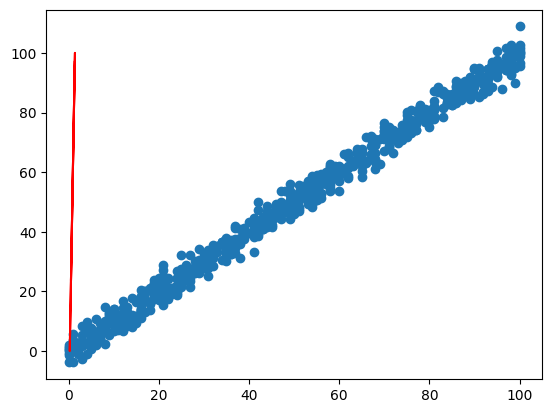

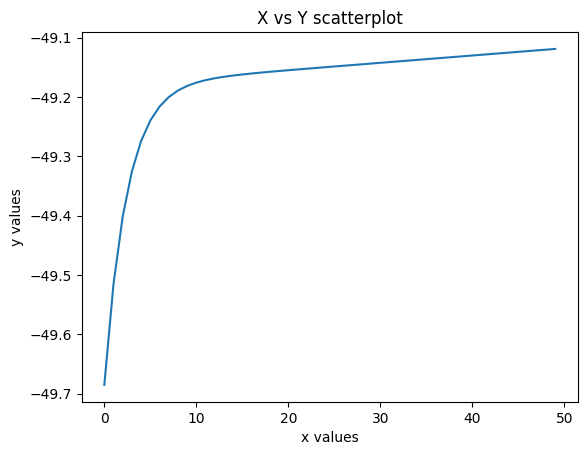

In [ ]:
x_value = training_data['x']
y_value = training_data['y']

type(x_value)
x_value = x_value.values.reshape(x_value.size)
y_value = y_value.values.reshape(y_value.size)

alpha=0.0001
iters=50
cost_values, theta_array = training(x_value, y_value, alpha, iters)

x_axis = np.arange(0, len(cost_values), step=1)
plt.plot(x_axis, cost_values)
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("X vs Y scatterplot")
plt.show()